In [9]:
#import required packages
import sys, os, re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error 
from math import sqrt
import scipy 

In [10]:
#open the modflow6 calculated heads on piezometers
hobSim = pd.read_csv('../calibrated/modelBuy/simulated_head.csv',index_col=0)
hobSim = hobSim.transpose()
hobSim.rename(columns={1.0:'Simulated'}, inplace=True)
hobSim.head()

FID,Simulated
PZ01,1456.038571
PZ02,1454.119555
PZ03,1458.164681
PZ04,1455.696685
PZ05,1450.692106


In [11]:
#open the observed heads data
hobObs = pd.read_csv('../observation/observed_head.csv',index_col=0)
hobObs.head()

,UTMX,UTMY,Observed
FID,,,
PZ01,680145.0,3245289.0,1450.31
PZ02,680296.0,3245257.0,1449.79
PZ03,680566.0,3245252.0,1447.56
PZ04,680963.0,3245193.0,1446.31
PZ05,680463.0,3245150.0,1450.75


In [12]:
#create a compiled pandas dataframe and calculate residual
piezoDf = pd.DataFrame()
piezoDf['Observed'] = hobObs['Observed'] 
piezoDf['Simulated'] = hobSim['Simulated']
piezoDf['Residual'] = piezoDf['Observed'] - piezoDf['Simulated']
piezoDf.to_csv('../observation/residual.csv')
piezoDf.head()

,Observed,Simulated,Residual
FID,,,
PZ01,1450.31,1456.038571,-5.728571
PZ02,1449.79,1454.119555,-4.329555
PZ03,1447.56,1458.164681,-10.604681
PZ04,1446.31,1455.696685,-9.386685
PZ05,1450.75,1450.692106,0.057894


In [13]:
#get some values about the residual
min=np.min(piezoDf.describe().loc['min'].values[0:2])
max=np.max(piezoDf.describe().loc['max'].values[0:2])
print("Res min: %.2f , Res max: %.2f"%(piezoDf['Residual'].min(), piezoDf['Residual'].max()))

Res min: -10.60 , Res max: 8.33


In [14]:
#root mean squared error (RMSE)
rmse = sqrt(mean_squared_error(piezoDf['Observed'].values, piezoDf['Simulated'].values))
rmse
#plt.text(1444, 1415, f"$RMSE%$: {round(rmse, 2)}$m$", fontsize=15)

4.278541276699959

In [15]:
#normalized root mean squared error (NRMSE)
nrmse = sqrt(mean_squared_error(piezoDf['Observed'].values, piezoDf['Simulated'].values))/\
             (piezoDf['Observed'].max()-piezoDf['Observed'].min())*100
nrmse
#plt.text(1442.7, 1412, f"$NRMSE$: {round(nrmse, 2)}%", fontsize=15)


12.83690752085199

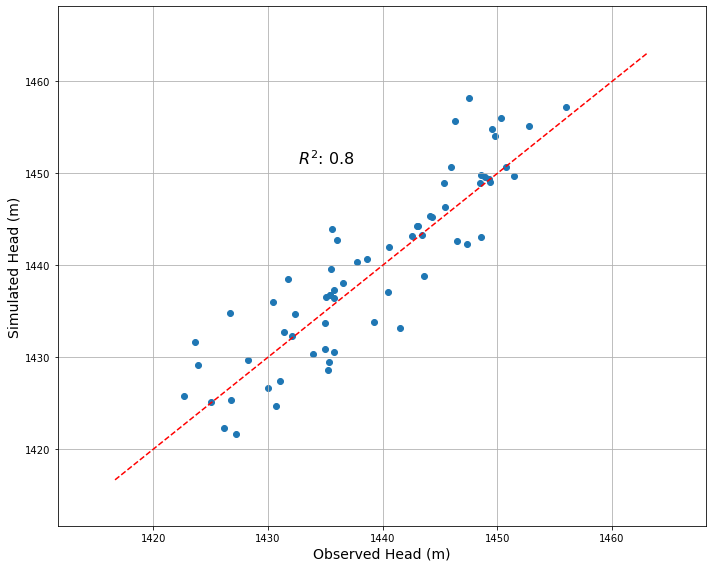

In [16]:
# generate observed - simulated plot
x = np.linspace(min-5, max+5, 100)
fig = plt.figure(figsize=(10,8))
plt.plot(x, x, linestyle='dashed', color='red')
plt.scatter(piezoDf['Observed'],piezoDf['Simulated'], marker='o')
#plt.scatter(piezoDf['Observed'],piezoDf['Simulated'], marker='o', c=piezoDf['Residual'])
#cbar = plt.colorbar()
#cbar.set_label('Residual (m)', fontsize=14)
plt.xlim(min-10,max+10)
plt.ylim(min-10,max+10)
plt.xlabel('Observed Head (m)', fontsize=14)
plt.ylabel('Simulated Head (m)', fontsize=14)
plt.grid()

#coefficient of determination (R2)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(piezoDf['Observed'].values, piezoDf['Simulated'].values)
rSquared = r_value * r_value
plt.text(1432.6, 1451, f"$R^2$: {round(rSquared, 2)}", fontsize=16)
fig.tight_layout()
plt.savefig("../fig/calibration.png", format = 'png')   

#plt.title("NRMSE: %.2f"%Nrmse, fontsize=15)